In [1]:
#!pip install nltk
#!pip install scikit-learn
#!pip install pandas
#!pip install catboost
#!pip install xgboost

<h4>Importing required packages</h4>

In [2]:
import pandas as pd
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
ps = SnowballStemmer(language = "english")
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /config/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h5>Read data</h5>

In [3]:
df = pd.read_csv("/config/workspace/emotions/data/data.csv")


<h4>Function for cleaning text data</h4>

In [4]:
def clean_text(text):
    result = re.sub("[^a-zA-Z]"," ",text)
    result = result.lower()
    result = result.split()
    result = [ps.stem(word) for word in result if word not in set(stopwords.words('english'))]
    result = " ".join(result)
    return result

<h4>Create cleaned Text data </h4>

In [5]:
df['cleaned_text'] = df["text"].apply(clean_text)

<h5>Display Head</h5>

In [6]:
df.head()

,text,emotions,cleaned_text
0,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
1,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
2,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
3,i am feeling grouchy,anger,feel grouchi
4,ive been feeling a little burdened lately wasn...,sadness,ive feel littl burden late wasnt sure


<h4>text to numeric</h4>
<h5>Label Encoding Target</h5>

In [7]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
le.fit(df['emotions'])
y = le.transform(df['emotions'])



<h5> For experimantaions we apply two transformations and compare the results</h5>

<h4> TfidfVectorizer</h4>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 2500)
xtf = tf.fit_transform(df["cleaned_text"]).toarray()
xtf.shape
 

 

(17998, 2500)

<h4>Countvectorizer</h4>

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
xcv = cv.fit_transform(df['cleaned_text']).toarray()
xcv.shape



(17998, 2500)

<h4>Splitting Data</h4>

In [19]:
from sklearn.model_selection import train_test_split
#for tfidfvectorizer:
#x_train,x_test,y_train,y_test = train_test_split(xtf,y,test_size = 0.3,random_state = 42)
#for countvectorizer:
x_train,x_test,y_train,y_test = train_test_split(xcv,y,test_size = 0.3,random_state = 42)


<h5>Importing required packages</h5>
<h5> Build score function</h5>
<h5>Classification models</h5>

In [11]:
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def evaluate_model(true,predicted):
    accuracy = accuracy_score(true,predicted)
    precision = precision_score(true,predicted ,average = "macro")
    f1 = f1_score(true,predicted ,average = "macro")
    return accuracy,precision,f1

models = {
    "LogisticRegression" : LogisticRegression(),
    "RidgeClassifier" : RidgeClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "XgbClassifier" : XGBClassifier(),
    "CatBoostClassifier" : CatBoostClassifier()
}


<h4>Model Training</h4>

In [13]:
model_list = []
accuracy_list = []
for  i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
  

    model_train_accuracy,model_train_precision,model_train_f1 = evaluate_model(y_train,y_train_pred)
    model_test_accuracy,model_test_precision,model_test_f1 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set :")
    print("Accuracy score : ",model_train_accuracy)
    print("Precision score :",model_train_precision)
    print("F1_score :",model_train_f1)
    print("*" * 25)
    print("Model performance for testing set :")
    
    print("Accuracy score : ",model_test_accuracy)
    print("Precision score :",model_test_precision)
    print("F1_score :",model_test_f1)
    accuracy_list.append(model_test_accuracy)
    print("=" * 36)
    print("\n")


LogisticRegression
Model performance for training set :
Accuracy score :  0.9615018256866169
Precision score : 0.9590092332391272
F1_score : 0.9533908684214113
*************************
Model performance for testing set :
Accuracy score :  0.8481481481481481
Precision score : 0.8118127710081762
F1_score : 0.8036815077407363


RidgeClassifier
Model performance for training set :
Accuracy score :  0.9375297666296237
Precision score : 0.9270029413080806
F1_score : 0.9191871611047292
*************************
Model performance for testing set :
Accuracy score :  0.8583333333333333
Precision score : 0.8279982099443131
F1_score : 0.8192830959266098


KNeighborsClassifier
Model performance for training set :
Accuracy score :  0.7664708683918082
Precision score : 0.7532156920473483
F1_score : 0.7111684240807014
*************************
Model performance for testing set :
Accuracy score :  0.6035185185185186
Precision score : 0.566599172951261
F1_score : 0.5168229831343535


DecisionTreeClassi

<h4>Build a sample model</h4>

In [14]:
#for xtf:
my_model = RidgeClassifier()
my_model.fit(x_train,y_train)
my_pred = my_model.predict(x_test)
acc_score = accuracy_score(y_test,my_pred)
acc_score
#xtf : 0.8548

0.8583333333333333

<h4>Confusion Matrix</h4>

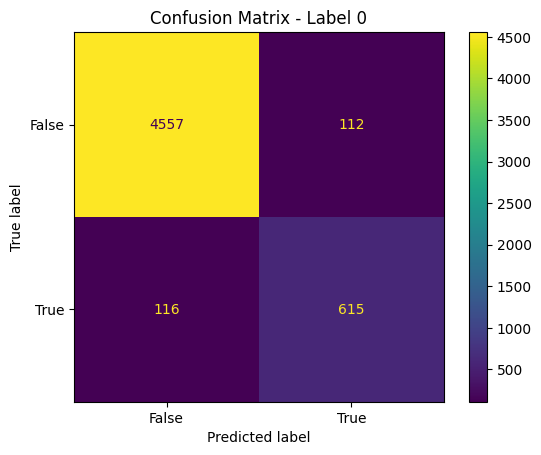

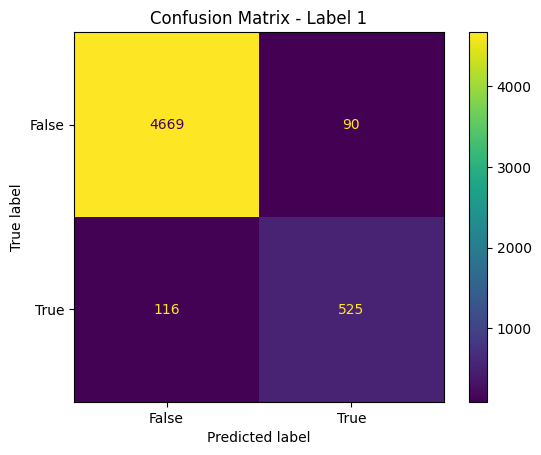

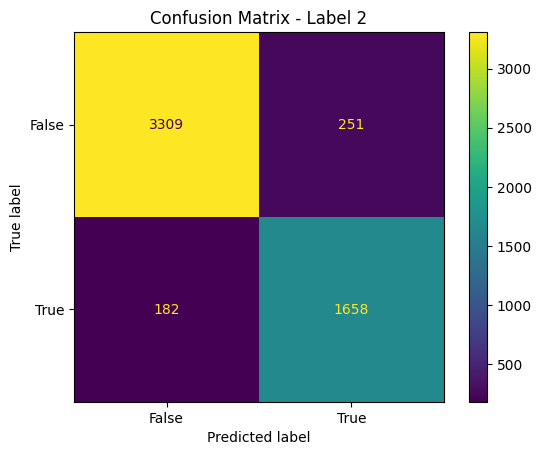

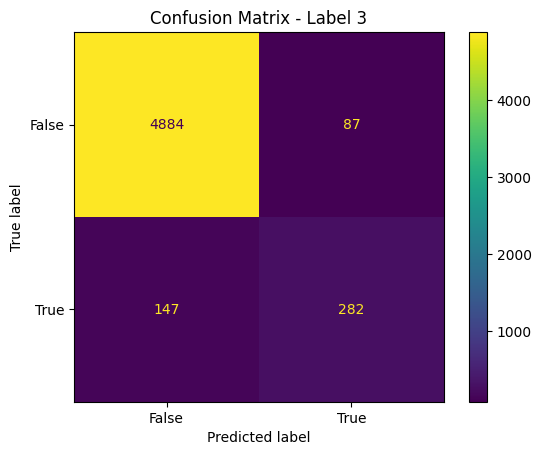

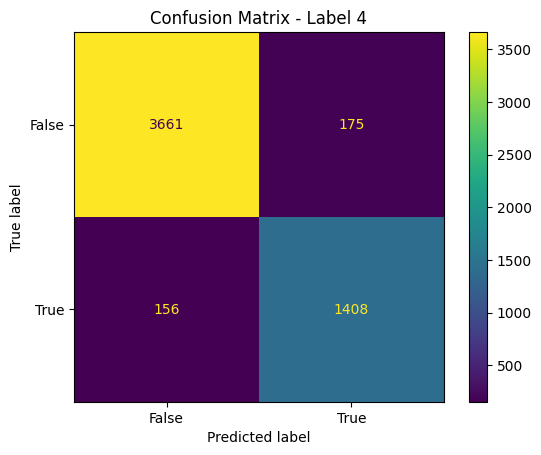

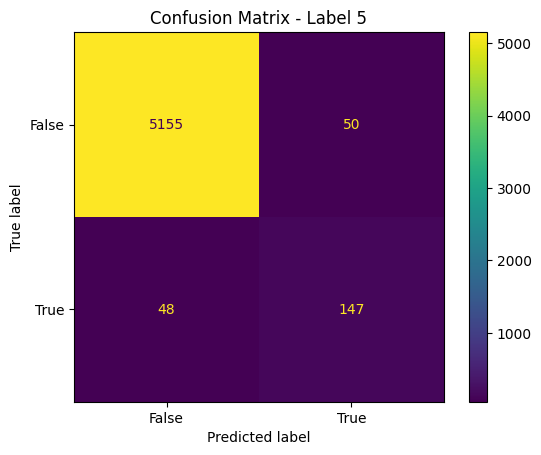

In [15]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels =  ["0","1","2","3","4","5"]
confusion_matrices = multilabel_confusion_matrix(y_test, my_pred, labels=labels)

 
for i, label in enumerate(labels):
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[i], display_labels=[False, True])
    cm_display.plot()
    plt.title(f"Confusion Matrix - Label {label}")
    plt.show()


In [17]:
#for xcv
my_model = XGBClassifier()
my_model.fit(x_train,y_train)
my_pred = my_model.predict(x_test)
acc_score = accuracy_score(y_test,my_pred)
acc_score

0.8557407407407407

<h5>Here xcv and xtf result are almost same we can use any model </h5>

<h1>............THE END ..........</h1>